In [1]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.optimizers import Adam  # Оптимизатор
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer #Нормировщики   [-1 1] [0 1] norm raspr
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов
from keras import optimizers
from google.colab import files

import matplotlib.pyplot as plt # Подключаем matplotlib
import numpy as np # Подключаем numpy
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [40]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [56]:
f(0)

(0.36, 0.12, 0)

In [5]:
def f1(t):
  return ((t*(np.sin(t))), (t*(np.cos(t))))

In [21]:
t_list = np.arange (0, 2*np.pi, 0.01)

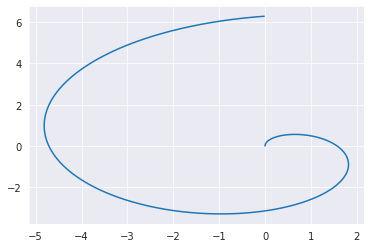

In [23]:
x, y = f1(t_list)
plt.plot(x, y)
plt.grid(True)
plt.show()  # значения

In [24]:
p=np.array([x,y])
p=p.transpose()
p.shape
t=np.copy(p)

In [25]:
model = keras.Sequential([

    Flatten(input_shape=(2,1)),

    Dense(50, activation='sigmoid'),

    Dense(2, activation='linear'),

    Dense(50, activation='sigmoid'),

    Dense(2, activation='linear')

])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
 dense_2 (Dense)             (None, 50)                150       
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.compile(loss='mse',optimizer='adam')  # обучаемся
log = model.fit(p,t,epochs=100)
model.evaluate(p,t)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 7.1901
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 6.4157
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 6.0039
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 5.7112
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 5.3478
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 4.8094
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 4.1140
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 3.3897
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 2.7867
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3962
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1677
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0064
Epoch 13/100
20/20 [=================

0.004344615153968334

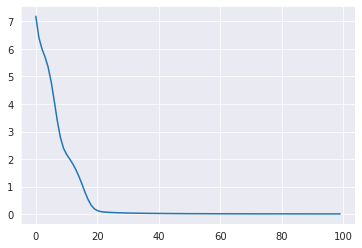

In [27]:
plt.plot(log.history['loss'])
plt.grid(True)
plt.show()

In [28]:
res=model.predict(p)
print(res.shape)

(629, 2)


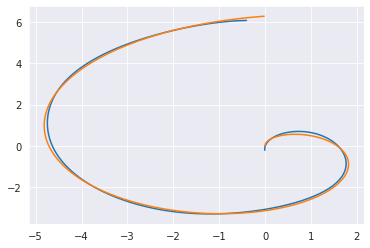

In [29]:
plt.plot(res[:,0], res[:,1])
plt.plot(x,y)
plt.grid(True)
plt.show()

In [31]:
### построим модельь с одним нейроном (узким горлом)

In [32]:
model2=keras.Sequential()
model2.add(Flatten (input_shape=(2,1)))
model2.add(Dense(50, activation='sigmoid'))
model2.add(Dense(1, activation='linear'))
model2.add(Dense(50, activation='sigmoid'))
model2.add(Dense(2, activation='linear'))
print(model2.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_4 (Dense)             (None, 50)                150       
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
 dense_6 (Dense)             (None, 50)                100       
                                                                 
 dense_7 (Dense)             (None, 2)                 102       
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model2.compile(loss='mse',optimizer='adam')
log = model2.fit(p,t,epochs=100)
model2.evaluate(p,t)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 6.0478
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 5.8850
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 5.6446
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 5.2649
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 4.7508
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 4.1008
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4562
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 2.8872
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5381
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3661
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3035
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 2.2828
Epoch 13/100
20/20 [=================

1.2092074155807495

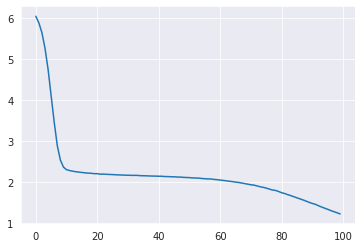

In [34]:
plt.plot(log.history['loss'])
plt.grid(True)
plt.show()

In [35]:
res=model2.predict(p)
print(res.shape)

(629, 2)


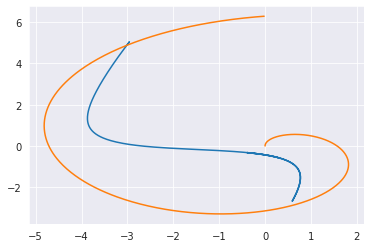

In [36]:
plt.plot(res[:,0], res[:,1])
plt.plot(x,y)
plt.grid(True)
plt.show()  # необычно получилось

In [37]:
### попробуем для другой функции

In [62]:
def f2(t):
  return ((t*(np.sin(t))), (t*(np.cos(t))), t)

In [83]:
def model1():
    print('load data')
    x, y, z = f2(t_list)
    print('Visualize data:\n')
    draw_3d(x, y, z)

    print('prepare data')
    p=np.array([x,y, z])
    p=p.transpose()
    t=np.copy(p)

    print('create model')
    model = keras.Sequential([

    Flatten(input_shape=(3,1)),

    Dense(50, activation='sigmoid'),

    Dense(2, activation='linear'),

    Dense(50, activation='sigmoid'),

    Dense(3, activation='linear')])
    print('model summary')
    print(model.summary())

    print('compiling model')
    model.compile(loss='mse',optimizer='adam')  # обучаемся
    log = model.fit(p,t,epochs=100)
    model.evaluate(p,t)

    print('loss:\n')
    plt.plot(log.history['loss'])
    plt.grid(True)
    plt.show()

    res=model.predict(p)
    print('plotting results:\n')
    draw_3d_2v(x, y, z, res[:,0], res[:,1], res[:,2])

load data
Visualize data:



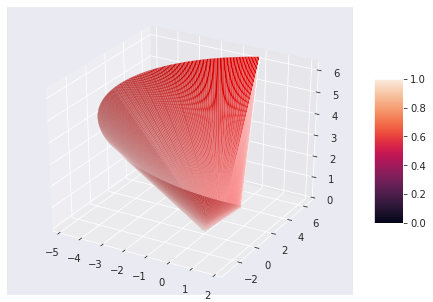

prepare data
create model
model summary
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3)                 0         
                                                                 
 dense_16 (Dense)            (None, 50)                200       
                                                                 
 dense_17 (Dense)            (None, 2)                 102       
                                                                 
 dense_18 (Dense)            (None, 50)                150       
                                                                 
 dense_19 (Dense)            (None, 3)                 153       
                                                                 
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________
None
compiling m

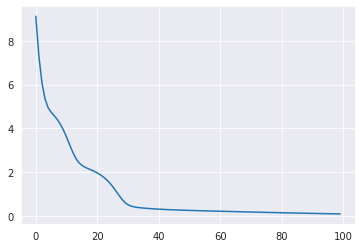

plotting results:



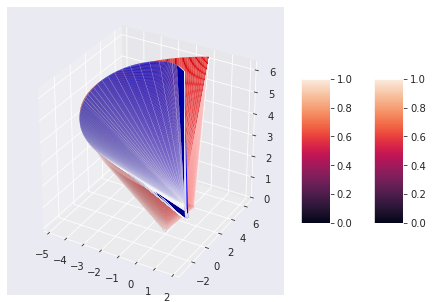

In [84]:
model1()

In [85]:
def model2():
    print('load data')
    x, y, z = f2(t_list)
    print('Visualize data:\n')
    draw_3d(x, y, z)

    print('prepare data')
    p=np.array([x,y, z])
    p=p.transpose()
    t=np.copy(p)

    print('create model')
    model = keras.Sequential([

    Flatten(input_shape=(3,1)),

    Dense(50, activation='sigmoid'),

    Dense(1, activation='linear'),

    Dense(50, activation='sigmoid'),

    Dense(3, activation='linear')])
    print('model summary')
    print(model.summary())

    print('compiling model')
    model.compile(loss='mse',optimizer='adam')  # обучаемся
    log = model.fit(p,t,epochs=100)
    model.evaluate(p,t)

    print('loss:\n')
    plt.plot(log.history['loss'])
    plt.grid(True)
    plt.show()

    res=model.predict(p)
    print('plotting results:\n')
    draw_3d_2v(x, y, z, res[:,0], res[:,1], res[:,2])

load data
Visualize data:



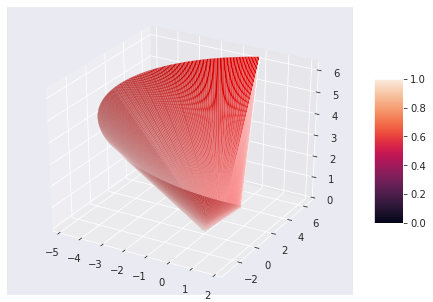

prepare data
create model
model summary
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3)                 0         
                                                                 
 dense_20 (Dense)            (None, 50)                200       
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
 dense_22 (Dense)            (None, 50)                100       
                                                                 
 dense_23 (Dense)            (None, 3)                 153       
                                                                 
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________
None
compiling m

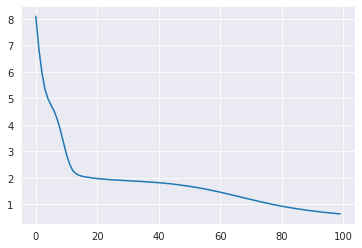

plotting results:



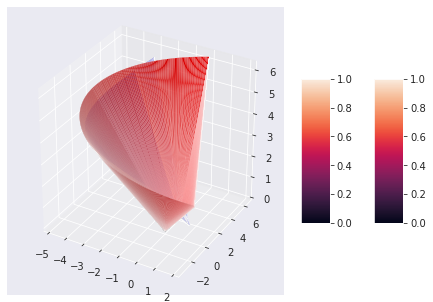

In [87]:
model2()

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sys import argv

In [72]:
def draw_3d_2v(x, y, z, x1, y1, z1):
  fig = plt.figure()
  ax = Axes3D(fig)
  surf = ax.plot_trisurf(x, y, z, color='red', linewidth=0.1)
  surf1 = ax.plot_trisurf(x1, y1, z1, color='blue', linewidth=0.1)
  fig.colorbar(surf, shrink=0.5, aspect=5)
  fig.colorbar(surf1, shrink=0.5, aspect=5)
  plt.show()

In [71]:
def draw_3d(x, y, z):
  fig = plt.figure()
  ax = Axes3D(fig)
  surf = ax.plot_trisurf(x, y, z, color='red', linewidth=0.1)
  fig.colorbar(surf, shrink=0.5, aspect=5)
  plt.show()